In [1]:
#Please execute this cell
import jupman;

# Exam -  Tue 12, Jul 2022

**Scientific Programming - Data Science Master @ University of Trento**

## [Download exercises and solutions](../../../_static/generated/sciprog-ds-2022-07-12-exam.zip) 


## Part A - Music Sequencer

<div class="alert alert-warning">
    
**NOTICE: this part of the exam was ported to** [this page](https://en.softpython.org/projects/music-sequencer/music-sequencer-sol.html?highlight=music) **on softpython website**
    
There you can find a more curated version (notice it may be longer than here)
</div>    

Open Jupyter and start editing this notebook `exam-2022-07-12.ipynb`

[ABC](http://abcnotation.com/wiki/abc:standard:v2.1#rrhythm) is a popular format to write music notation in plain text files, you can see an example by openining [tunes1.abc](tunes1.abc) with a text editor. A music sequencer is an editor software which typically displays notes as a matrix: you will parse simplified abc tunes and display their melodies in a matrix.

## A1 parse_melody

Write a function which given a melody as a string of notes translates it to a list of tuples:

```python
>>> parse_melody("|A4      C2  E2 |C4      E D C2 |C3    B3    G2 |")
[(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)]
```

Each melody note is followed by its duration. If no duration number is specified, we assume it is one. 

Each tuple first element represents a note as a number from `0` (`A`) to `6` (`G`) and the second element is the note length in the sequencer. We assume our sequencer has a resolution of two beats per note, so for us a note `A` would have length `2`, a note `A2` a length `4`, a note `A3` a length `6` and so on.

* **DO NOT** care about spaces nor bars `|`, they have no meaning at all
* **USE** `ord` python function to get a character position

In [2]:


def parse_melody(melody):    
    
    notes = melody.replace('|',' ').split()
    
    ret = []
    for note in notes:        
        n = ord(note[0])-ord('A')
        if len(note) == 1:
            ret.append((n,2))
        else:
            ret.append((n,2*int(note[1])))
    
    return ret
    

from pprint import pprint
melody1 = "|A4      C2  E2 |C4      E D C2 |C3    B3    G2 |"
pprint(parse_melody(melody1) )

assert parse_melody("||") == []
assert parse_melody("|A|") == [(0,2)]
assert parse_melody("|A3|") == [(0,6)]
assert parse_melody("|A B|") == [(0,2), (1,2)]
assert parse_melody("|C D|") == [(2,2), (3,2)]
assert parse_melody(" | G    F  |   ") == [(6,2), (5,2)]
assert parse_melody("|D|B|") == [(3,2), (1,2)]
assert parse_melody("|D3 E4|") == [(3,6),(4,8)]
assert parse_melody("|F|A2 B|") == [(5,2),(0,4),(1,2)]
assert parse_melody("|A4      C2  E2 |C4      E D C2 |C3    B3    G2 |") == \
       [(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)]

[(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)]


In [2]:


def parse_melody(melody):    
    raise Exception('TODO IMPLEMENT ME !')

from pprint import pprint
melody1 = "|A4      C2  E2 |C4      E D C2 |C3    B3    G2 |"
pprint(parse_melody(melody1) )

assert parse_melody("||") == []
assert parse_melody("|A|") == [(0,2)]
assert parse_melody("|A3|") == [(0,6)]
assert parse_melody("|A B|") == [(0,2), (1,2)]
assert parse_melody("|C D|") == [(2,2), (3,2)]
assert parse_melody(" | G    F  |   ") == [(6,2), (5,2)]
assert parse_melody("|D|B|") == [(3,2), (1,2)]
assert parse_melody("|D3 E4|") == [(3,6),(4,8)]
assert parse_melody("|F|A2 B|") == [(5,2),(0,4),(1,2)]
assert parse_melody("|A4      C2  E2 |C4      E D C2 |C3    B3    G2 |") == \
       [(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)]

## A2 parse_tunes

An `.abc` file is a series of key:value fields. Keys are always one character long. Anything after a `%` is a comment and must be ignored

File [tunes1.abc](tunes1.abc) EXCERPT:

In [3]:
with open("tunes1.abc", encoding='utf-8') as f: print(''.join(f.readlines()[0:18]))

%abc-2.1
H:Tune made in a dark algorithmic night    % history and origin in header, so replicated in all tunes!
O:Trento                                   

X:1                      % index
T:Algorave               % title
C:The Lord of the Loop   % composer
M:4/4                    % meter
K:C                      % key
|A4      C2  E2 |C4      E D C2 |C3    B3    G2 |   % melodies can also have a comment

X:2                      
T:Transpose Your Head
C:Matrix Queen  
O:Venice                 % overriding header
M:3/4
K:G
|F2  G4     |E4      E F|A2  B2  D2 |D3    E3   |C3    C3   |   



First lines (3 in the example) are the file header, separated by tunes with a blank line.

* first line must always be ignored
* fields specified in the file header must be copied in all tunes.
    * Note **a tune may override** a field (es `O:Venice`)

After the first blank line, there is the first tune:

* `X` is the tune index, convert it to integer
* `M` is the meter, convert it to a tuple of two integers
* `K` is the last field of metadata
*  melody line has no field key, it always follows line with `K` and it immediately begins with a pipe: convert it to list by calling `parse_melody`

Following tunes are separated by blank lines

Write a function `parse_tunes` which parses the file and outputs a list of dictionaries, one per tune. Use provided `field_names` to obtain dictionary keys. Full expected db is in [expected_db1.py](expected_db1.py) file.

<div class="alert alert-warning">
  
**DO NOT write hundreds of** `ifs` 
    
Special keys are listed above, all others should be treated in a generic way        
</div>            

<div class="alert alert-warning">
  
**DO NOT assume header always contains** `'origin'` **and** `'history'`
    
It can contain _any_ field, which has to be then copied in all the tunes, see [tunes2.abc](tunes2.abc) for extra examples.
</div>            

**Example (EXCERPT)**:


```python
>>> tunes_db1 = parse_tunes('tunes1.abc')
>>> pprint(tunes_db1[:2],width=150) 
[
 {'composer': 'The Lord of the Loop',
  'history': 'Tune made in a dark algorithmic night',
  'index': 1,
  'key': 'C',
  'melody': [(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)],
  'meter': (4, 4),
  'origin': 'Trento',
  'title': 'Algorave'
 },
 {'composer': 'Matrix Queen',
  'history': 'Tune made in a dark algorithmic night',
  'index': 2,
  'key': 'G',
  'melody': [(5, 4),(6, 8),(4, 8),(4, 2),(5, 2),(0, 4),(1, 4),(3, 4),(3, 6),(4, 6),(2, 6),(2, 6)],
  'meter': (3, 4),
  'origin': 'Venice',
  'title': 'Transpose Your Head'
 }
]

```


In [4]:


field_names = {
    'C':'composer',
    'D':'discography',
    'H':'history',    
    'K':'key',        
    'M':'meter',    
    'O':'origin',    
    'T':'title',    
    'X':'index',    
}

def parse_tunes(filename):
    
   
    with open(filename, encoding='utf-8') as f:
        f.readline()  # skips %abc-2.1
        tunes = []
        common = {}
        line = f.readline()
        while line != '':
            clean_line = line.split('%')[0].strip()
            if clean_line == '':
                tune = common.copy()
                tunes.append(tune)
            else:                
                # process value
                k,v = clean_line.split(':')
                if k == 'X':    # index
                    vp = int(v)
                elif k == 'K':  # key                          
                    vp = v
                    melody_line = f.readline()
                    melody_line = melody_line.split('%')[0].strip()
                    tune['melody'] = parse_melody(melody_line)
                elif k == 'M':  # meter
                    s = v.split('/')
                    vp = (int(s[0]), int(s[1]))
                else:
                    vp = v
                                                                        
                if len(tunes) == 0: # header                    
                    common[field_names[k]] = vp
                else:               # tune
                    tune[field_names[k]] = vp
            line = f.readline()
            
        return tunes
    
    
tunes_db1 = parse_tunes('tunes1.abc')
pprint(tunes_db1[:3],width=150)


[{'composer': 'The Lord of the Loop',
  'history': 'Tune made in a dark algorithmic night',
  'index': 1,
  'key': 'C',
  'melody': [(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)],
  'meter': (4, 4),
  'origin': 'Trento',
  'title': 'Algorave'},
 {'composer': 'Matrix Queen',
  'history': 'Tune made in a dark algorithmic night',
  'index': 2,
  'key': 'G',
  'melody': [(5, 4), (6, 8), (4, 8), (4, 2), (5, 2), (0, 4), (1, 4), (3, 4), (3, 6), (4, 6), (2, 6), (2, 6)],
  'meter': (3, 4),
  'origin': 'Venice',
  'title': 'Transpose Your Head'},
 {'composer': 'anonymous truck driver',
  'history': 'Tune made in a dark algorithmic night',
  'index': 3,
  'key': 'E',
  'melody': [(6, 4), (1, 4), (3, 8), (3, 6), (4, 4), (4, 4), (3, 2), (6, 6), (1, 6), (6, 4)],
  'meter': (4, 4),
  'origin': 'Trento',
  'title': 'Pedal to the Metal'}]


In [4]:


field_names = {
    'C':'composer',
    'D':'discography',
    'H':'history',    
    'K':'key',        
    'M':'meter',    
    'O':'origin',    
    'T':'title',    
    'X':'index',    
}

def parse_tunes(filename):
    raise Exception('TODO IMPLEMENT ME !')
    
tunes_db1 = parse_tunes('tunes1.abc')
pprint(tunes_db1[:3],width=150)


In [5]:
assert tunes_db1[0]['history']=='Tune made in a dark algorithmic night'
assert tunes_db1[0]['origin']=='Trento'
assert tunes_db1[0]['index']==1
assert tunes_db1[0]['title']=='Algorave'
assert tunes_db1[0]['composer']=='The Lord of the Loop'
assert tunes_db1[0]['meter']==(4,4)
assert tunes_db1[0]['key']== 'C'
assert tunes_db1[0]['melody']==\
[(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)]
assert tunes_db1[1]['history']=='Tune made in a dark algorithmic night'  
assert tunes_db1[1]['origin']=='Venice'   # tests override
assert tunes_db1[1]['index']==2
assert tunes_db1[1]['title']=='Transpose Your Head'
assert tunes_db1[1]['composer']=='Matrix Queen'
assert tunes_db1[1]['meter']==(3,4)
assert tunes_db1[1]['key']== 'G'
assert tunes_db1[1]['melody']==\
[(5, 4), (6, 8), (4, 8), (4, 2), (5, 2), (0, 4), (1, 4), (3, 4), (3, 6), (4, 6), (2, 6), (2, 6)]
from expected_db1 import expected_db1
assert len(tunes_db1) == len(expected_db1)
assert tunes_db1 == expected_db1

tunes_db2 = parse_tunes('tunes2.abc')
pprint(tunes_db2)

from expected_db2 import expected_db2
assert tunes_db2 == expected_db2

[{'composer': 'Drum Shaman',
  'discography': 'Sounds from the Jungle, 1968',
  'history': 'Folk songs collected while travelling',
  'index': 1,
  'key': 'E',
  'melody': [(6, 2),
             (6, 4),
             (6, 2),
             (6, 2),
             (0, 2),
             (4, 4),
             (4, 2),
             (4, 2),
             (3, 12)],
  'meter': (4, 4),
  'title': 'Jungle Beat'},
 {'composer': 'The Crazy Gipsy',
  'history': 'Folk songs collected while travelling',
  'index': 2,
  'key': 'G',
  'melody': [(0, 6), (0, 6), (6, 4), (4, 6), (0, 6), (6, 4)],
  'meter': (2, 4),
  'title': 'Byte Polka'}]


## A3 plot_tune


Write a function which takes a tune dictionary from the db and outputs a plot where the ys are all the notes on keyboard (we assume 7 notes without black keys) and xs represent the duration of a note. If you didn't manage to implement it copy expected tune from [expected_db1.py](expected_db1.py))

* use beats as xs, remembering the shortest note has two beats
* to increase thickness, use `linewidth=5` parameter

![expected-plot.png](expected-plot.png)

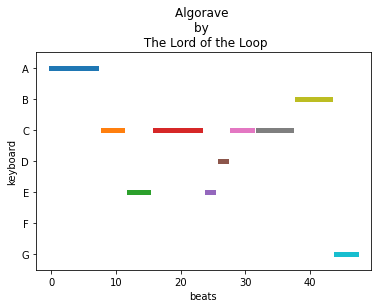

In [6]:

%matplotlib inline
import matplotlib.pyplot as plt

def plot_tune(tune):
    
   
    
    j = 0
    for n,d in tune['melody']:
        r = 6 - n
        xs = [j, j+d-1]
        ys = [r, r]
        j += d    
        plt.plot(xs, ys, linewidth=5)
    
    plt.title('%s \nby \n %s' %(tune['title'], tune['composer']))
    plt.ylim(-0.5,6.5)
    plt.yticks(range(7), [chr(ord('G')-i) for i in range(7)])
    plt.xlabel('beats')
    plt.ylabel('keyboard')
    
    
    
plot_tune(tunes_db1[0])

In [6]:

%matplotlib inline
import matplotlib.pyplot as plt

def plot_tune(tune):
    raise Exception('TODO IMPLEMENT ME !')
    
plot_tune(tunes_db1[0])

## Part B

* Open Visual Studio Code and start editing the folder on your desktop
* For running tests: open _Accessories -> Terminal_ 

## B1.1 Theory

**Write the solution in separate `theory.txt` file**

Given a list `L` of $n$ elements, please compute the asymptotic computational complexity of the `myFun` function, explaining your reasoning. 

```python

def myFun(L):
    n = sum(L)
    prods = {}
    for i in range(len(L)):
        prods[i] = 0
        for j in range(len(L)):
            prods[i] *= j
    for k in range(len(L)//2):
        prods[k] *= k
    return prods

myFun([3, 9, 7, 5, 18, 19, 20])
```

## B1.2 complexity

What do we mean when we say that an algorithm has asymptotic computational complexity $O(n^3)$    ? What do we have to do to prove that an algorithm has asymptotic computational complexity $O(n^3)$ ?


## B2 BinTree same_rec

Open file `bin_tree.py` and implement this method:

def same_rec(self, other):
    """ RETURN True if this binary tree is equal to other binary tree,
        otherwise return False.
        
        - MUST execute in O(n) where n is the number of nodes of the tree
        - NOTE: with big trees a recursive solution would surely 
                exceed the call stack, but here we don't mind
    """


**Testing**: `python3 -m unittest bin_tree_test.SameRecTest`

In [9]:
from bin_tree_test import bt

t1 = bt(7, 
            bt(5))
t2 = bt(7, 
            bt(5))        
t1.same_rec(t2)

True

In [10]:
t1 = bt(7, 
            None,
            bt(9))
t2 = bt(7, 
            bt(11,
                   bt(7)))
           
t1.same_rec(t2)

False

## B3 GenericTree follow

Open file `gen_tree.py` and implement this method:

def follow(self, positions):
    """ RETURN an array of node data, representing a branch from the
        root down to a certain depth.
        The path to follow is determined by given positions, which
        is an array of integer indeces, see example.
        
        - if provided indeces lead to non-existing nodes, raise ValueError
        - IMPORTANT: *DO NOT* use recursion, use a couple of while instead.
        - IMPORTANT: *DO NOT* attempt to convert siblings to 
                     a python list !!!! Doing so will give you less points!
    """



**Example:**
```


              level  01234      

                     a
                     ├b
                     ├c
                     |└e
                     | ├f
                     | ├g
                     | |└i
                     | └h
                     └d            

                    RETURNS
t.follow([])        [a]          root data is always present
t.follow([0])       [a,b]        b is the 0-th child of a
t.follow([2])       [a,d]        d is the 2-nd child of a 
t.follow([1,0,2])   [a,c,e,h]    c is the 1-st child of a 
                                 e is the 0-th child of c 
                                 h is the 2-nd child of e
t.follow([1,0,1,0]) [a,c,e,g,i]  c is the 1-st child of a
                                 e is the 0-th child of c 
                                 g is the 1-st child of e
                                 i is the 0-th child of g
```

**Testing**: `python3 -m unittest gen_tree_test.FollowTest`


In [13]:
#ignore this
import jupman
import bin_tree_test
jupman.run(bin_tree_test)
import gen_tree_test
jupman.run(gen_tree_test)

.......................
----------------------------------------------------------------------
Ran 23 tests in 0.021s

OK
............
----------------------------------------------------------------------
Ran 12 tests in 0.015s

OK
